<img src="https://github.com/arthurflor23/handwritten-text-recognition/blob/master/doc/image/header.png?raw=true" />

# Handwritten Text Recognition using TensorFlow 2.x

This tutorial shows how you can use the project [Handwritten Text Recognition](https://github.com/arthurflor23/handwritten-text-recognition) in your Google Colab.



## 1 Localhost Environment

We'll make sure you have the project in your Google Drive with the datasets in HDF5. If you already have structured files in the cloud, skip this step.

### 1.1 Datasets

The datasets that you can use:

a. [Bentham](http://www.transcriptorium.eu/~tsdata/)

b. [IAM](http://www.fki.inf.unibe.ch/databases/iam-handwriting-database)

c. [Rimes](http://www.a2ialab.com/doku.php?id=rimes_database:start)

d. [Saint Gall](https://fki.tic.heia-fr.ch/databases/saint-gall-database)

e. [Washington](https://fki.tic.heia-fr.ch/databases/washington-database)

### 1.2 Raw folder

On localhost, download the code project from GitHub and extract the chosen dataset (or all if you prefer) in the **raw** folder. Don't change anything of the structure of the dataset, since the scripts were made from the **original structure** of them. Your project directory will be like this:

```
.
├── raw
│   ├── bentham
│   │   ├── BenthamDatasetR0-GT
│   │   └── BenthamDatasetR0-Images
│   ├── iam
│   │   ├── ascii
│   │   ├── forms
│   │   ├── largeWriterIndependentTextLineRecognitionTask
│   │   ├── lines
│   │   └── xml
│   ├── rimes
│   │   ├── eval_2011
│   │   ├── eval_2011_annotated.xml
│   │   ├── training_2011
│   │   └── training_2011.xml
│   ├── saintgall
│   │   ├── data
│   │   ├── ground_truth
│   │   ├── README.txt
│   │   └── sets
│   └── washington
│       ├── data
│       ├── ground_truth
│       ├── README.txt
│       └── sets
└── src
    ├── data
    │   ├── evaluation.py
    │   ├── generator.py
    │   ├── preproc.py
    │   ├── reader.py
    │   ├── similar_error_analysis.py
    ├── main.py
    ├── network
    │   ├── architecture.py
    │   ├── layers.py
    │   ├── model.py
    └── tutorial.ipynb

```

After that, create virtual environment and install the dependencies with python 3 and pip:

> ```python -m venv .venv && source .venv/bin/activate```

> ```pip install -r requirements.txt```

### 1.3 HDF5 files

Now, you'll run the *transform* function from **main.py**. For this, execute on **src** folder:

> ```python main.py --source=<DATASET_NAME> --transform```

Your data will be preprocess and encode, creating and saving in the **data** folder. Now your project directory will be like this:


```
.
├── data
│   ├── bentham.hdf5
│   ├── iam.hdf5
│   ├── rimes.hdf5
│   ├── saintgall.hdf5
│   └── washington.hdf5
├── raw
│   ├── bentham
│   │   ├── BenthamDatasetR0-GT
│   │   └── BenthamDatasetR0-Images
│   ├── iam
│   │   ├── ascii
│   │   ├── forms
│   │   ├── largeWriterIndependentTextLineRecognitionTask
│   │   ├── lines
│   │   └── xml
│   ├── rimes
│   │   ├── eval_2011
│   │   ├── eval_2011_annotated.xml
│   │   ├── training_2011
│   │   └── training_2011.xml
│   ├── saintgall
│   │   ├── data
│   │   ├── ground_truth
│   │   ├── README.txt
│   │   └── sets
│   └── washington
│       ├── data
│       ├── ground_truth
│       ├── README.txt
│       └── sets
└── src
    ├── data
    │   ├── evaluation.py
    │   ├── generator.py
    │   ├── preproc.py
    │   ├── reader.py
    │   ├── similar_error_analysis.py
    ├── main.py
    ├── network
    │   ├── architecture.py
    │   ├── layers.py
    │   ├── model.py
    └── tutorial.ipynb

```

Then upload the **data** and **src** folders in the same directory in your Google Drive.

## 2 Google Drive Environment


### 2.1 TensorFlow 2.x

Make sure the jupyter notebook is using GPU mode.

In [ ]:
!nvidia-smi

Fri Aug  6 07:47:21 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

device_name = tf.test.gpu_device_name()

if device_name != "/device:GPU:0":
    raise SystemError("GPU device not found")

print("Found GPU at: {}".format(device_name))

Found GPU at: /device:GPU:0


### 2.2 Google Drive

Mount your Google Drive partition.

**Note:** *\"Colab Notebooks/handwritten-text-recognition/src/\"* was the directory where you put the project folders, specifically the **src** folder.

In [ ]:
from google.colab import drive

drive.mount("./gdrive", force_remount=True)

%cd "./gdrive/My Drive/itp-nypl/src/"
!ls -l

Mounted at ./gdrive
/content/gdrive/My Drive/itp-nypl/src
total 33
drwx------ 2 root root  4096 Aug  5 21:55 data
-rw------- 1 root root  9212 Aug  5 20:06 main.py
drwx------ 2 root root  4096 Aug  5 21:55 network
-rw------- 1 root root     0 Aug  2 08:02 --transform
-rw------- 1 root root 16138 Jun 23 16:23 tutorial.ipynb


After mount, you can see the list os files in the project folder.

## 3 Set Python Classes

### 3.1 Environment

First, let's define our environment variables.

Set the main configuration parameters, like input size, batch size, number of epochs and list of characters. This make compatible with **main.py** and jupyter notebook:

* **dataset**: "bentham", "iam", "rimes", "saintgall", "washington"

* **arch**: network to run: "bluche", "puigcerver", "flor"

* **epochs**: number of epochs

* **batch_size**: number size of the batch

In [ ]:
import os
import datetime
import string

# define parameters
source = "NYPL"
arch = "flor"
epochs = 1000
batch_size = 16

# define paths
source_path = os.path.join("..", "data", f"{source}.hdf5")
output_path = os.path.join("..", "output", source, arch)
target_path = os.path.join(output_path, "checkpoint_weights.hdf5")
os.makedirs(output_path, exist_ok=True)

# define input size, number max of chars per line and list of valid chars
input_size = (1024, 128, 1)
max_text_length = 128
charset_base = string.printable[:95]

print("source:", source_path)
print("output", output_path)
print("target", target_path)
print("charset:", charset_base)

source: ../data/NYPL.hdf5
output ../output/NYPL/flor
target ../output/NYPL/flor/checkpoint_weights.hdf5
charset: 0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 


### 3.2 DataGenerator Class

The second class is **DataGenerator()**, responsible for:

* Load the dataset partitions (train, valid, test);

* Manager batchs for train/validation/test process.

In [ ]:
from data.generator import DataGenerator

dtgen = DataGenerator(source=source_path,
                      batch_size=batch_size,
                      charset=charset_base,
                      max_text_length=max_text_length)

print(f"Train images: {dtgen.size['train']}")
print(f"Validation images: {dtgen.size['valid']}")
print(f"Test images: {dtgen.size['test']}")

Train images: 344
Validation images: 24
Test images: 96


### 3.3 HTRModel Class

The third class is **HTRModel()**, was developed to be easy to use and to abstract the complicated flow of a HTR system. It's responsible for:

* Create model with Handwritten Text Recognition flow, in which calculate the loss function by CTC and decode output to calculate the HTR metrics (CER, WER and SER);

* Save and load model;

* Load weights in the models (train/infer);

* Make Train/Predict process using *generator*.

To make a dynamic HTRModel, its parameters are the *architecture*, *input_size* and *vocab_size*.

In [ ]:
from network.model import HTRModel

# create and compile HTRModel
model = HTRModel(architecture=arch,
                 input_size=input_size,
                 vocab_size=dtgen.tokenizer.vocab_size,
                 beam_width=10,
                 stop_tolerance=20,
                 reduce_tolerance=15)

model.compile(learning_rate=0.001)
model.summary(output_path, "summary.txt")

# get default callbacks and load checkpoint weights file (HDF5) if exists
model.load_checkpoint(target=target_path)

callbacks = model.get_callbacks(logdir=output_path, checkpoint=target_path, verbose=1)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 1024, 128, 1)]    0         
_________________________________________________________________
conv2d (Conv2D)              (None, 512, 64, 16)       160       
_________________________________________________________________
p_re_lu (PReLU)              (None, 512, 64, 16)       16        
_________________________________________________________________
batch_normalization (BatchNo (None, 512, 64, 16)       112       
_________________________________________________________________
full_gated_conv2d (FullGated (None, 512, 64, 16)       4640      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 64, 32)       4640      
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 512, 64, 32)       32    

## 4 Training

The training process is similar to the *fit()* of the Keras. After training, the information (epochs and minimum loss) is save.

In [ ]:
tb = dtgen.next_train_batch()
for k in tb:
  print(k[0].shape)
  break

(16, 1024, 128, 1)


In [ ]:
# to calculate total and average time per epoch
start_time = datetime.datetime.now()

h = model.fit(x=dtgen.next_train_batch(),
              epochs=epochs,
              steps_per_epoch=dtgen.steps['train'],
              validation_data=dtgen.next_valid_batch(),
              validation_steps=dtgen.steps['valid'],
              callbacks=callbacks,
              shuffle=True,
              verbose=1)

total_time = datetime.datetime.now() - start_time

loss = h.history['loss']
val_loss = h.history['val_loss']

min_val_loss = min(val_loss)
min_val_loss_i = val_loss.index(min_val_loss)

time_epoch = (total_time / len(loss))
total_item = (dtgen.size['train'] + dtgen.size['valid'])

t_corpus = "\n".join([
    f"Total train images:      {dtgen.size['train']}",
    f"Total validation images: {dtgen.size['valid']}",
    f"Batch:                   {dtgen.batch_size}\n",
    f"Total time:              {total_time}",
    f"Time per epoch:          {time_epoch}",
    f"Time per item:           {time_epoch / total_item}\n",
    f"Total epochs:            {len(loss)}",
    f"Best epoch               {min_val_loss_i + 1}\n",
    f"Training loss:           {loss[min_val_loss_i]:.8f}",
    f"Validation loss:         {min_val_loss:.8f}"
])

with open(os.path.join(output_path, "train.txt"), "w") as lg:
    lg.write(t_corpus)
    print(t_corpus)

Epoch 1/1000
22/22 [==============================] - 4s 187ms/step - loss: 16.3030 - val_loss: 40.1030

Epoch 00001: val_loss did not improve from 39.91895
Epoch 2/1000
22/22 [==============================] - 4s 175ms/step - loss: 16.3195 - val_loss: 40.3892

Epoch 00002: val_loss did not improve from 39.91895
Epoch 3/1000
22/22 [==============================] - 4s 178ms/step - loss: 16.1566 - val_loss: 40.3904

Epoch 00003: val_loss did not improve from 39.91895
Epoch 4/1000
22/22 [==============================] - 4s 178ms/step - loss: 16.5095 - val_loss: 40.2301

Epoch 00004: val_loss did not improve from 39.91895
Epoch 5/1000
22/22 [==============================] - 4s 179ms/step - loss: 16.3410 - val_loss: 40.4302

Epoch 00005: val_loss did not improve from 39.91895
Epoch 6/1000
22/22 [==============================] - 4s 180ms/step - loss: 15.7570 - val_loss: 40.4145

Epoch 00006: val_loss did not improve from 39.91895
Epoch 7/1000
22/22 [==============================] - 4s 1

## 5 Predict

The predict process is similar to the *predict* of the Keras:

Model Predict
6/6 [==============================] - 2s 59ms/step
CTC Decode
1/6 [====>.........................] - ETA: 5s

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


6/6 [==============================] - 6s 1s/step



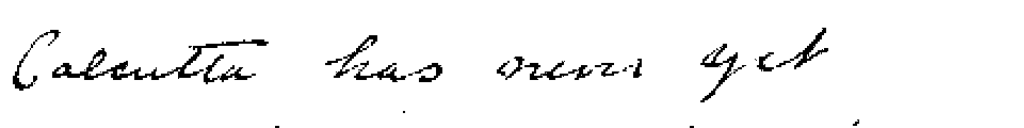

Calcutta has never yet
Cacuthe has meos yt 




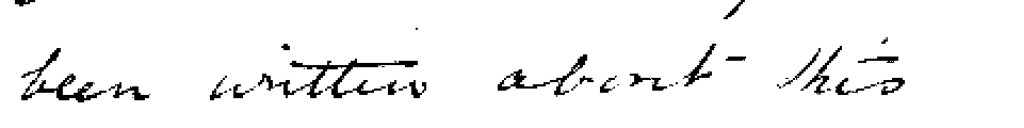

been written about this
ben withen aont dis 




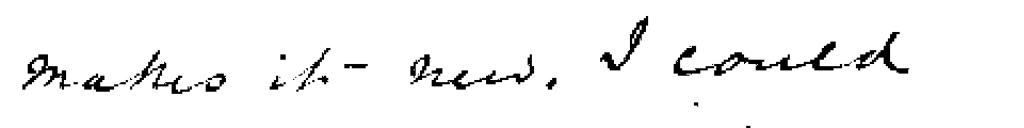

makes it new. I could
m ates it mend. I could 




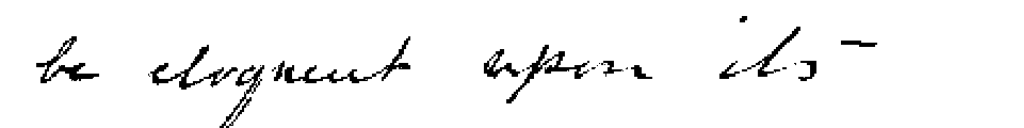

be eloquent upon its
be cloguent apor i. 




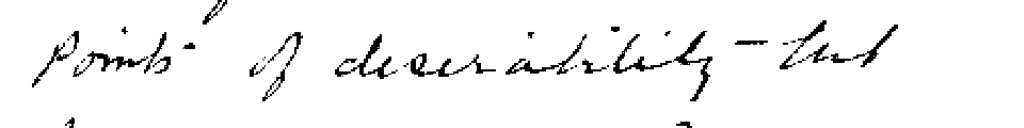

Points of desirability but
font I dicnitilily but 




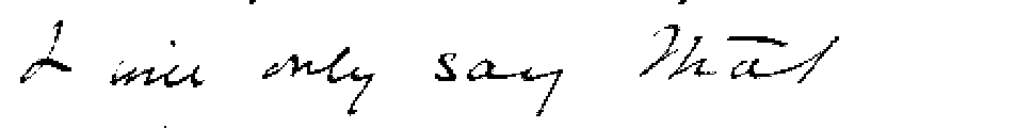

I will only say that
I mie mly say thas 




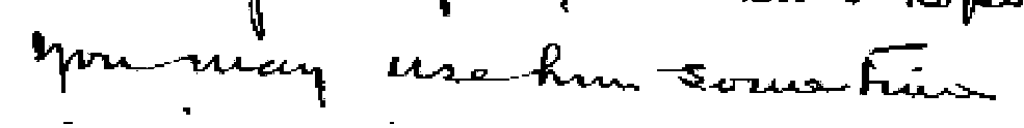

you may use him some him
you nay mre to soue he 




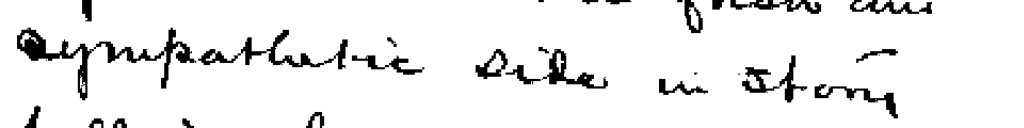

again - He has a fresh and
ayupartione aite a sfou 




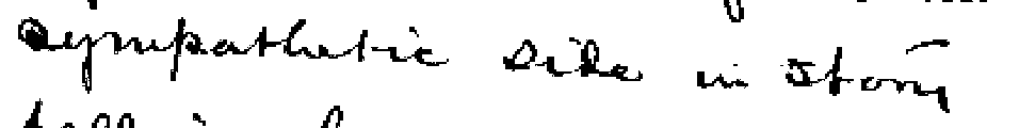

Sympathetic sike in story
reyrupartirie wite in sfor 




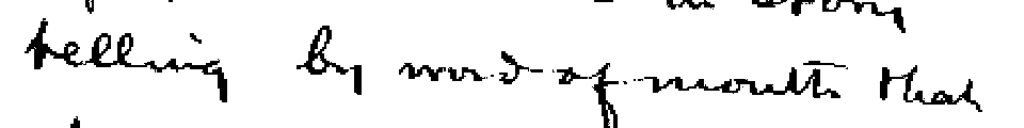

telling by word of month that
bellng ts mot ofmotr tear 



In [ ]:
from data import preproc as pp
from google.colab.patches import cv2_imshow

start_time = datetime.datetime.now()

# predict() function will return the predicts with the probabilities
predicts, _ = model.predict(x=dtgen.next_test_batch(),
                            steps=dtgen.steps['test'],
                            ctc_decode=True,
                            verbose=1)

# decode to string
predicts = [dtgen.tokenizer.decode(x[0]) for x in predicts]
ground_truth = [x.decode() for x in dtgen.dataset['test']['gt']]

total_time = datetime.datetime.now() - start_time

# mount predict corpus file
with open(os.path.join(output_path, "predict.txt"), "w") as lg:
    for pd, gt in zip(predicts, ground_truth):
        lg.write(f"TE_L {gt}\nTE_P {pd}\n")
   
for i, item in enumerate(dtgen.dataset['test']['dt'][:10]):
    print("=" * 1024, "\n")
    cv2_imshow(pp.adjust_to_see(item))
    print(ground_truth[i])
    print(predicts[i], "\n")

## 6 Evaluate

Evaluation process is more manual process. Here we have the `ocr_metrics`, but feel free to implement other metrics instead. In the function, we have three parameters: 

* predicts
* ground_truth
* norm_accentuation (calculation with/without accentuation)
* norm_punctuation (calculation with/without punctuation marks)

In [ ]:
from data import evaluation

evaluate = evaluation.ocr_metrics(predicts, ground_truth)

e_corpus = "\n".join([
    f"Total test images:    {dtgen.size['test']}",
    f"Total time:           {total_time}",
    f"Time per item:        {total_time / dtgen.size['test']}\n",
    f"Metrics:",
    f"Character Error Rate: {evaluate[0]:.8f}",
    f"Word Error Rate:      {evaluate[1]:.8f}",
    f"Sequence Error Rate:  {evaluate[2]:.8f}"
])

with open(os.path.join(output_path, "evaluate.txt"), "w") as lg:
    lg.write(e_corpus)
    print(e_corpus)

Total test images:    96
Total time:           0:00:07.650605
Time per item:        0:00:00.079694

Metrics:
Character Error Rate: 0.46445098
Word Error Rate:      0.84386161
Sequence Error Rate:  1.00000000
